In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator
from pylab import *
%matplotlib inline

In [2]:
def create_date(month,year):
    """Creates the date"""
 
    date = dt.datetime(int(year), int(month), 1)
    mdate = matplotlib.dates.date2num(date)
 
    return mdate
 

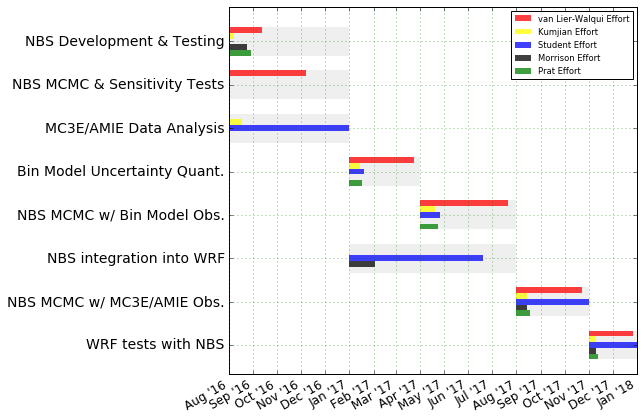

In [61]:
# Data
 
pos = arange(0.5,8.,0.75)
#pos = arange(0.5,5.5,.5)

norm=.55

Mv_base = 0.5 /norm
MK_base = 0.08333/norm
Sl_base = 0.55/norm
HM_base = 0.08333/norm
OP_base = 0.1/norm

ylabels = []
#..Y1
ylabels.append('NBS Development & Testing')
ylabels.append('NBS MCMC & Sensitivity Tests')
ylabels.append('MC3E/AMIE Data Analysis')
#..Y2
ylabels.append('Bin Model Uncertainty Quant.')
ylabels.append('NBS MCMC w/ Bin Model Obs.')
ylabels.append('NBS integration into WRF')
#..Y3
ylabels.append('NBS MCMC w/ MC3E/AMIE Obs.')
ylabels.append('WRF tests with NBS')
#ylabels.append('Manuscripts and Final Report')
 
effort = []
#..            Marcus         Matt        Slave      Hugh         Olivier
#..Y1
effort.append([Mv_base*.3,    MK_base*.3,    0.,      HM_base,     OP_base  ]) #..NBS dev, testing
effort.append([Mv_base*.7,         0,        0.,      0.,           0.      ]) #..NBS MCMC & sens
effort.append([0.,            MK_base*.7, Sl_base,    0.,           0.      ]) #..MC3E/AMIE obs
#..Y2
effort.append([Mv_base,       MK_base,    Sl_base*.2, 0.,          OP_base  ]) #..Bin model UQ
effort.append([Mv_base,       MK_base,    Sl_base*.2, 0.,          OP_base  ]) #..NBS MCMC w/Bin
effort.append([0.,                 0,     Sl_base*.8, HM_base,      0.      ]) #..NBS to WRF
#..Y3
effort.append([Mv_base,       MK_base,    Sl_base,    HM_base,     OP_base   ]) #..NBS MCMC w/Obs
effort.append([Mv_base,       MK_base,    Sl_base,    HM_base,     OP_base  ]) #..WRF w/NBS
#effort.append([0.7, 0.4])
 
customDates = []
#..Y1
customDates.append([create_date(8,2016),create_date(1,2017)])
customDates.append([create_date(8,2016),create_date(1,2017),create_date(1,2017)])
customDates.append([create_date(8,2016),create_date(1,2017),create_date(1,2017)])
#..Y2
customDates.append([create_date(1,2017),create_date(4,2017),create_date(4,2017)])
customDates.append([create_date(4,2017),create_date(8,2017),create_date(8,2017)])
customDates.append([create_date(1,2017),create_date(8,2017),create_date(8,2017)])
#..Y3
customDates.append([create_date(8,2017),create_date(11,2017),create_date(11,2017)])
customDates.append([create_date(11,2017),create_date(1,2018),create_date(1,2018)])
#customDates.append([create_date(4,2015),create_date(8,2015),create_date(8,2015)])
 
task_dates = {}
for i,task in enumerate(ylabels):
    task_dates[task] = customDates[i]
# task_dates['Climatology'] = [create_date(5,2014),create_date(6,2014),create_date(10,2013)]
# task_dates['Structure'] = [create_date(10,2013),create_date(3,2014),create_date(5,2014)]
# task_dates['Impacts'] = [create_date(5,2014),create_date(12,2014),create_date(2,2015)]
# task_dates['Thesis'] = [create_date(2,2015),create_date(5,2015)]
 
# Initialise plot
 
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0.35,0.1,0.63,0.85]) #[left,bottom,width,height]
#ax = fig.add_subplot(111)
 
# Plot the data
mult = 0.75
addr = 1.25
#mult = 1.
#addr = 1.5
#mult = 0.5
#addr = 1.
 
start_date,end_date = task_dates[ylabels[0]]
ax.barh(0.5, end_date - start_date, left=start_date, height=0.5, align='center', color='0.7', alpha = 0.2,
        linewidth=0.0)
ax.barh(0.30, (end_date - start_date)*effort[0][0], left=start_date, height=0.1, align='center', 
        color='red', alpha = 0.75, label = "van Lier-Walqui Effort",linewidth=0.0)
ax.barh(0.40, (end_date - start_date)*effort[0][1], left=start_date, height=0.1, align='center', 
        color='yellow', alpha = 0.75, label = "Kumjian Effort",linewidth=0.0)
ax.barh(0.50, (end_date - start_date)*effort[0][2], left=start_date, height=0.1, align='center', 
        color='blue', alpha = 0.75, label = "Student Effort",linewidth=0.0)
ax.barh(0.60, (end_date - start_date)*effort[0][3], left=start_date, height=0.1, align='center', 
        color='black', alpha = 0.75, label = "Morrison Effort",linewidth=0.0)
ax.barh(0.70, (end_date - start_date)*effort[0][4], left=start_date, height=0.1, align='center', 
        color='green', alpha = 0.75, label = "Prat Effort",linewidth=0.0)
for i in range(0,len(ylabels)-1):
    labels = ['Analysis','Reporting'] if i == 1 else [None,None]
    start_date,mid_date,end_date = task_dates[ylabels[i+1]]
    eff_all = effort[i+1]
    ax.barh((i*mult)+addr, mid_date - start_date, left=start_date, height=0.5, align='center', color='0.7',
            alpha = 0.2,linewidth=0.0)
    ax.barh((i*mult)+addr-0.2, (mid_date - start_date)*eff_all[0], left=start_date, height=0.1, align='center',
            color='red', alpha = 0.75,linewidth=0.0)
    ax.barh((i*mult)+addr-0.1, (mid_date - start_date)*eff_all[1], left=start_date, height=0.1, align='center',
            color='yellow', alpha = 0.75,linewidth=0.0)
    ax.barh((i*mult)+addr, (mid_date - start_date)*eff_all[2], left=start_date, height=0.1, align='center',
            color='blue', alpha = 0.75,linewidth=0.0)
    ax.barh((i*mult)+addr+0.1, (mid_date - start_date)*eff_all[3], left=start_date, height=0.1, align='center',
            color='black', alpha = 0.75,linewidth=0.0)
    ax.barh((i*mult)+addr+0.2, (mid_date - start_date)*eff_all[4], left=start_date, height=0.1, align='center',
            color='green', alpha = 0.75,linewidth=0.0)
#ax.barh((i*0.5)+1.0, end_date - mid_date, left=mid_date, height=0.3, align='center',label=labels[1], color='yellow')
 
# Format the y-axis
 
locsy, labelsy = yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 14)
 
# Format the x-axis
 
ax.axis('tight')
ax.set_ylim(ymin = -0.1, ymax = pos.max()-1)
ax.grid(color = 'g', linestyle = ':')
 
ax.xaxis_date() #Tell matplotlib that these are dates...
 
rule = rrulewrapper(MONTHLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter("%b '%y")
 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=12)
 
# Format the legend
 
font = font_manager.FontProperties(size='small')
ax.legend(loc=1,prop=font)
 
# Finish up
ax.invert_yaxis()
fig.autofmt_xdate()
#plt.savefig('gantt.svg')
plt.savefig('/home/mvanlier/Dropbox/Proposals/DOE_MvLW_Morr_Kum_2015/gantt.pdf')
plt.show()